In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)



In [ ]:
train = pd.read_csv('train.csv')

train_orignal = train.copy()

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [ ]:
test = pd.read_csv('test.csv')

test_original = test.copy()

In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [ ]:
import pandas as pd


combined_data = pd.concat([train, test], ignore_index=True, sort=True)
combined_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [ ]:
combined_data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [ ]:
def remove_pattern(text,pattern):


    r = re.findall(pattern,text)


    for i in r:
        text = re.sub(i,"",text)

    return text

In [ ]:
combined_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combined_data['tweet'],"@[\w]*")

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].str.replace("[^a-zA-Z#]"," ")

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [ ]:
tokenized_tweets = combined_data['Cleaned_Tweets'].apply(lambda x: x.split())

tokenized_tweets.head()

,Cleaned_Tweets
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


In [ ]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweets.head()

,Cleaned_Tweets
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


In [ ]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

combined_data['Clean_Tweets'] = tokenized_tweets
combined_data.head()


,id,label,tweet,Cleaned_Tweets,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation,factsguide: societi #motiv


In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
positive_words = ' '.join(text for text in combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

In [ ]:

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_color = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black',height=1500,width=4000,mask=Mask).generate(positive_words)

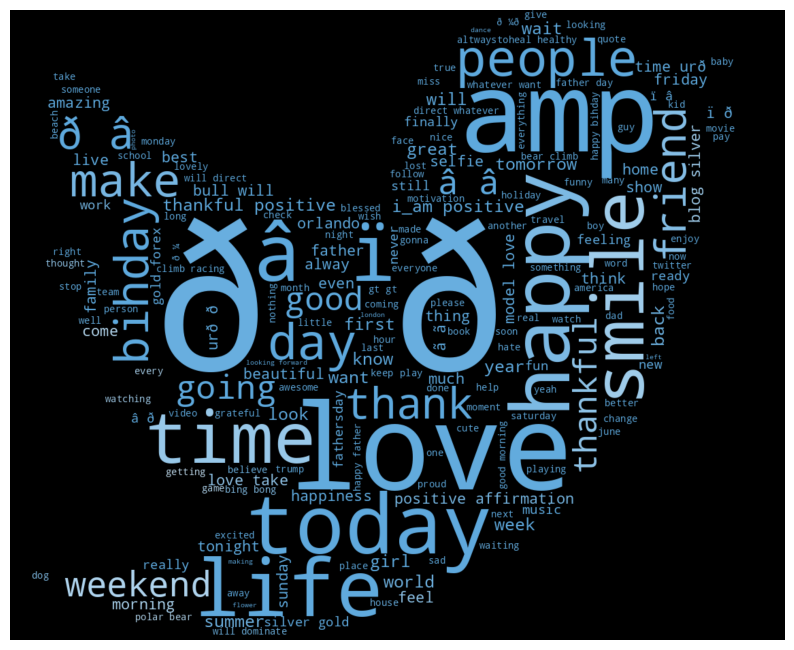

In [ ]:

plt.figure(figsize=(10,20))


plt.imshow(wc.recolor(color_func=image_color),interpolation="hamming")

plt.axis('off')
plt.show()

In [ ]:
negative_words = ' '.join(text for text in combined_data['Clean_Tweets'][combined_data['label'] == 1])

In [ ]:

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)


wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(negative_words)

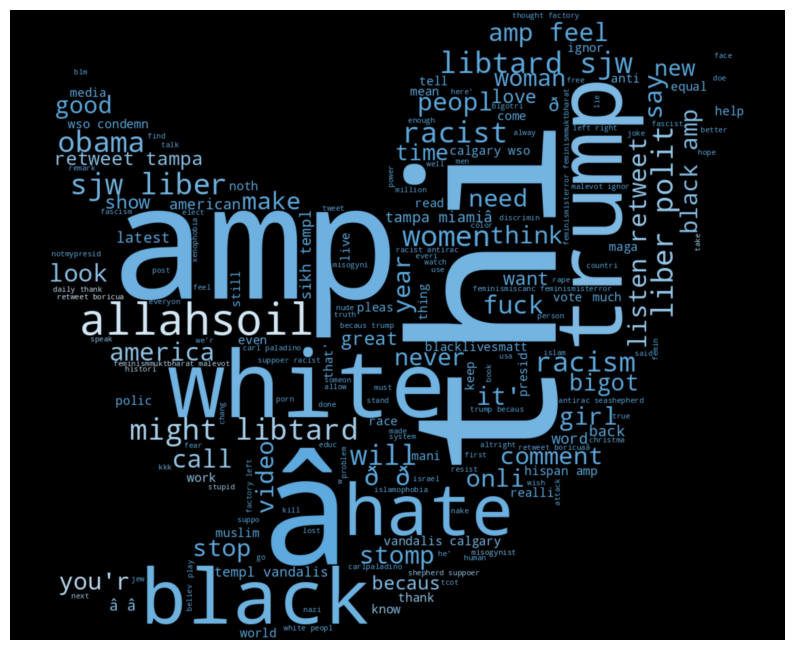

In [ ]:

plt.figure(figsize=(10,20))


plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [ ]:
def extractHashtags(x):
    hashtags = []


    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

In [ ]:
positive_hashTags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

positive_hashTags

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 []

In [ ]:
positive_hastags_unnested = sum(positive_hashTags,[])
positive_hastags_unnested

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1989',
 

In [ ]:
negative_hashtags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 1])

In [ ]:
negative_hashtags_unnest = (sum(negative_hashtags,[]))
negative_hashtags_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'cleveland',
 

In [ ]:
positive_word_freq = nltk.FreqDist(positive_hastags_unnested)

positive_word_freq

FreqDist({'love': 1531, 'positive': 874, 'healthy': 570, 'smile': 548, 'thankful': 491, 'fun': 434, 'life': 405, 'summer': 367, 'model': 364, 'affirmation': 363, ...})

In [ ]:
positive_df = pd.DataFrame({'Hashtags': list(positive_word_freq.keys()),'Count' : list(positive_word_freq.values())})
positive_df

,Hashtags,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364
...,...,...
22595,ucsdâ,1
22596,berlincitygirl,1
22597,zÃ¼rich,1
22598,genf,1


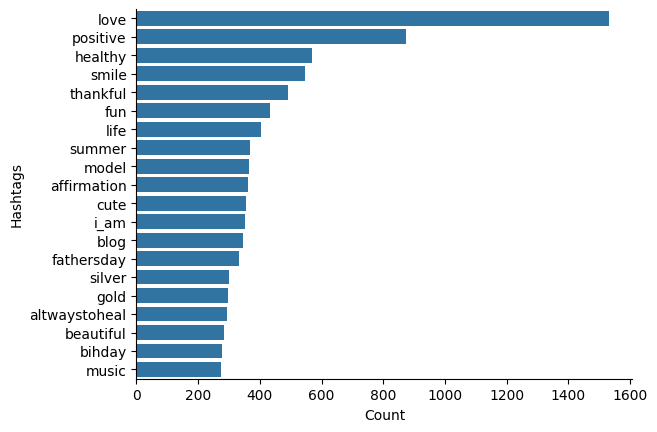

In [ ]:
positive_df_plot = positive_df.nlargest(20,columns='Count')

sns.barplot(data=positive_df_plot,y='Hashtags',x='Count')
sns.despine()

In [ ]:
negative_word_freq = nltk.FreqDist(negative_hashtags_unnest)

negative_word_freq

FreqDist({'trump': 133, 'politics': 94, 'allahsoil': 92, 'libtard': 76, 'liberal': 75, 'sjw': 74, 'retweet': 57, 'black': 44, 'miamiâ': 38, 'hate': 32, ...})

In [ ]:
negative_df = pd.DataFrame({'Hashtags':list(negative_word_freq.keys()),'Count':list(negative_word_freq.values())})

negative_df

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
...,...,...
1926,jumpedtheshark,1
1927,freemilo,5
1928,milo,4
1929,mailboxpride,1


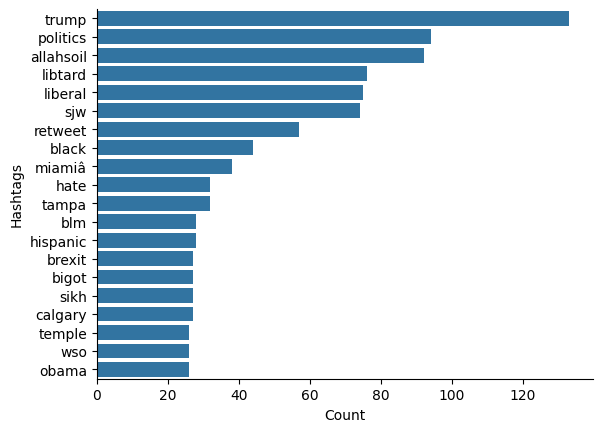

In [ ]:
negative_df_plot = negative_df.nlargest(20,columns='Count')

sns.barplot(data=negative_df_plot,y='Hashtags',x='Count')
sns.despine()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vecotrizer = CountVectorizer(max_df=0.90, min_df = 2, max_features = 1000, stop_words="english")

bow = bow_vecotrizer.fit_transform(combined_data['Cleaned_Tweets'])

bow_df = pd.DataFrame(bow.todense())

bow_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

tfidf_matrix = tfidf.fit_transform(combined_data['Cleaned_Tweets'])

tfidf_df = pd.DataFrame(tfidf_matrix.todense())

tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print("Shape of train:", train.shape)
print("Shape of bow:", bow.shape)

train_bow = bow[:train.shape[0]]
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, train['label'], test_size=0.3, random_state=2)

Shape of train: (31962, 3)
Shape of bow: (49159, 1000)


In [ ]:

train_tfidf_matrix = tfidf_matrix[:train.shape[0]]


x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix, train['label'], test_size=0.3, random_state=17)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [ ]:
log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [ ]:
predict_bow = log_Reg.predict_proba(x_valid_bow)
predict_bow

array([[9.67663853e-01, 3.23361467e-02],
       [9.99853269e-01, 1.46731349e-04],
       [9.14552366e-01, 8.54476336e-02],
       ...,
       [6.38495483e-01, 3.61504517e-01],
       [9.45843593e-01, 5.41564073e-02],
       [9.68570625e-01, 3.14293745e-02]])

In [ ]:

prediction_int = predict_bow[:,1] >=0.3

prediction_int = prediction_int.astype(int)
prediction_int

log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5531197301854974

In [ ]:

log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [ ]:
predict_tfidf = log_Reg.predict_proba(x_valid_tfidf)
predict_tfidf

array([[0.97577622, 0.02422378],
       [0.96779452, 0.03220548],
       [0.93973124, 0.06026876],
       ...,
       [0.93679327, 0.06320673],
       [0.92585529, 0.07414471],
       [0.97883009, 0.02116991]])

In [ ]:
prediction_int = predict_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

log_tfidf = f1_score(y_valid_tfidf,prediction_int)
log_tfidf

0.5754141238012206

In [ ]:
test_tfidf = tfidf_matrix[31962:]
test_pred = log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

In [ ]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_valid_tfidf, prediction_int)
precision = precision_score(y_valid_tfidf, prediction_int)
recall = recall_score(y_valid_tfidf, prediction_int)
f1 = f1_score(y_valid_tfidf, prediction_int)

summary = f"""
Model Performance Summary:
Accuracy: {accuracy:.4f}
Precision: {precision:.4f}
Recall: {recall:.4f}
F1-Score: {f1:.4f}
"""

print(summary)


Model Performance Summary:
Accuracy: 0.9492
Precision: 0.6613
Recall: 0.5093
F1-Score: 0.5754

